In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
matplotlib.__version__

'3.8.4'

In [5]:
path = r'C:\Users\User\Documents\World Happiness Data'

In [7]:
df_wh2019 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'wh2019.csv'), index_col = False)

In [9]:
df_wh2019.corr()

ValueError: could not convert string to float: 'Finland'

In [11]:
df_wh2019.dtypes

Rank                          int64
Country                      object
Score                       float64
Economy                     float64
Social support              float64
Life_Expectancy             float64
Freedom_of_choice           float64
Perception_of_corruption    float64
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_wh2019["Country"]=le.fit_transform(df_wh2019["Country"])

In [25]:
df_wh2019.dtypes

Rank                          int64
Country                       int32
Score                       float64
Economy                     float64
Social support              float64
Life_Expectancy             float64
Freedom_of_choice           float64
Perception_of_corruption    float64
dtype: object

In [27]:
df_wh2019.corr()

,Rank,Country,Score,Economy,Social support,Life_Expectancy,Freedom_of_choice,Perception_of_corruption
Rank,1.000000,0.009578,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.351959
Country,0.009578,1.000000,-0.023039,0.021662,0.135603,-0.026412,0.041065,0.029526
Score,-0.989096,-0.023039,1.000000,0.793883,0.777058,0.779883,0.566742,0.385613
Economy,-0.801947,0.021662,0.793883,1.000000,0.754906,0.835462,0.379079,0.298920
Social support,-0.767465,0.135603,0.777058,0.754906,1.000000,0.719009,0.447333,0.181899
Life_Expectancy,-0.787411,-0.026412,0.779883,0.835462,0.719009,1.000000,0.390395,0.295283
Freedom_of_choice,-0.546606,0.041065,0.566742,0.379079,0.447333,0.390395,1.000000,0.438843
Perception_of_corruption,-0.351959,0.029526,0.385613,0.298920,0.181899,0.295283,0.438843,1.000000


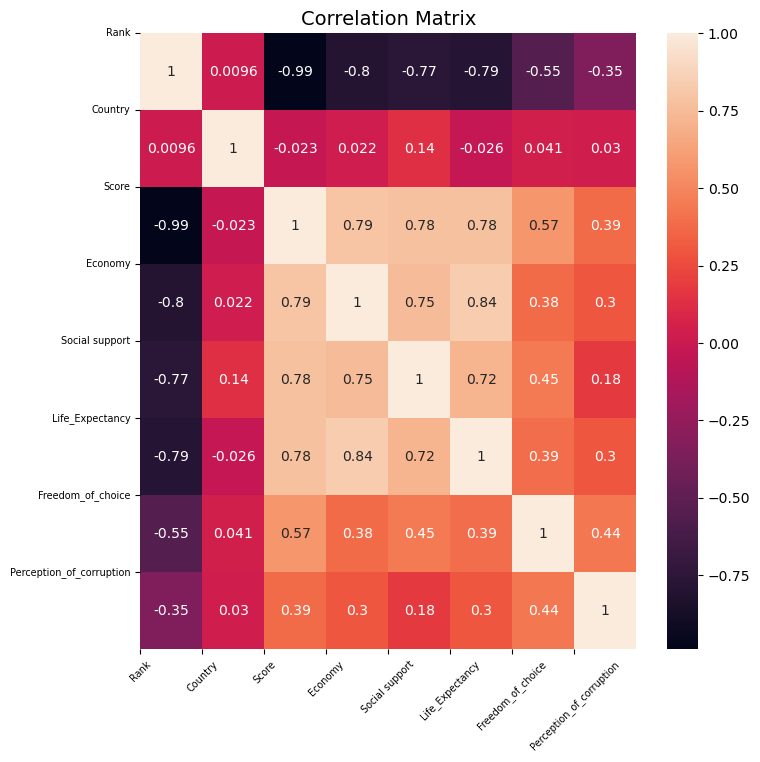

In [99]:
f,ax = plt.subplots(figsize=(8,8))
corr = sns.heatmap(df_wh2019.corr(), annot = True, ax = ax)
plt.xticks(range(df_wh2019.shape[1]), df_wh2019.columns, fontsize=7, rotation=45) # x axis labels
plt.yticks(range(df_wh2019.shape[1]), df_wh2019.columns, fontsize=7) # y axis labels
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'corr_heatmap_2019.pdf'))

## Scatterplots on different criteria

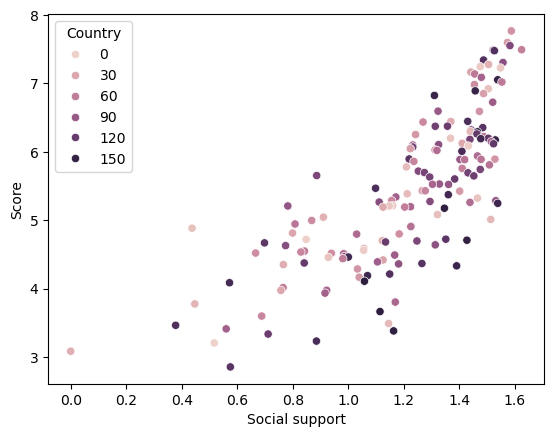

In [101]:
sns.scatterplot(x='Social support',y='Score',hue='Country',data=df_wh2019)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'SP_SocialSupport_2019.pdf'))

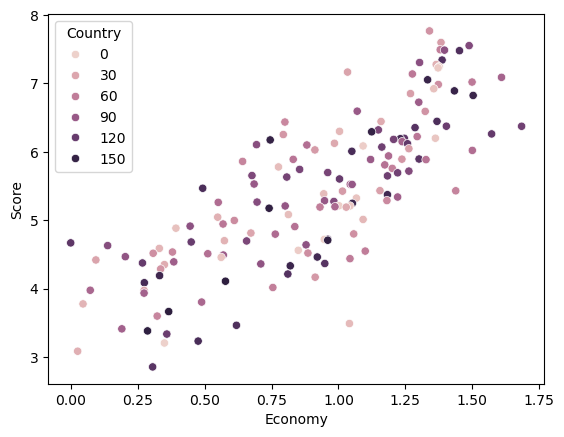

In [103]:
sns.scatterplot(x='Economy',y='Score',hue='Country',data=df_wh2019)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'SP_Economy_2019.pdf'))

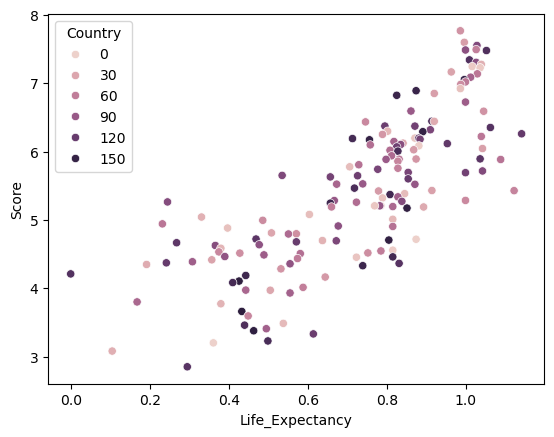

In [105]:
sns.scatterplot(x='Life_Expectancy',y='Score',hue='Country',data=df_wh2019)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'SP_LifeExpectancy_2019.pdf'))

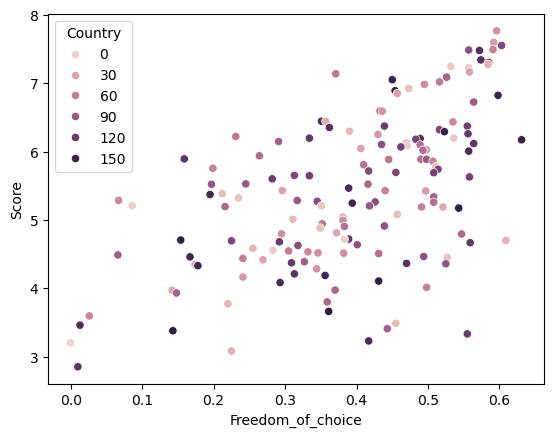

In [107]:
sns.scatterplot(x='Freedom_of_choice',y='Score',hue='Country',data=df_wh2019)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'SP_FreedomOfChoice_2019.pdf'))

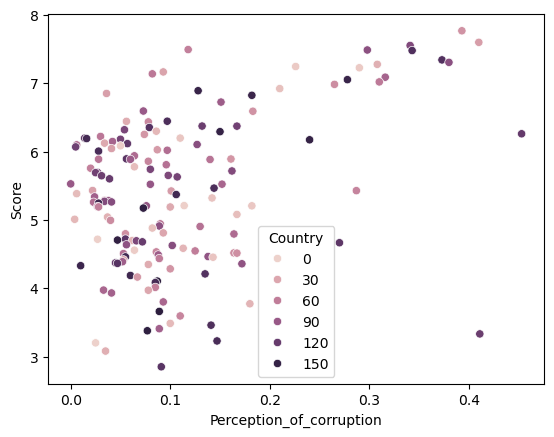

In [109]:
sns.scatterplot(x='Perception_of_corruption',y='Score',hue='Country',data=df_wh2019)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'SP_PerceptionOfCorup_2019.pdf'))

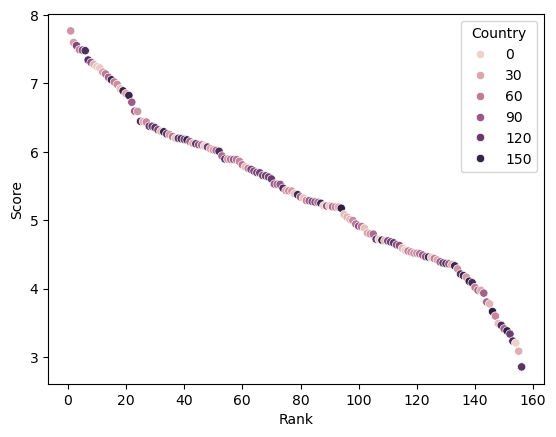

In [111]:
sns.scatterplot(x='Rank',y='Score',hue='Country',data=df_wh2019)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'SP_Rank_2019.pdf'))

## Pair Plots on entire dataset

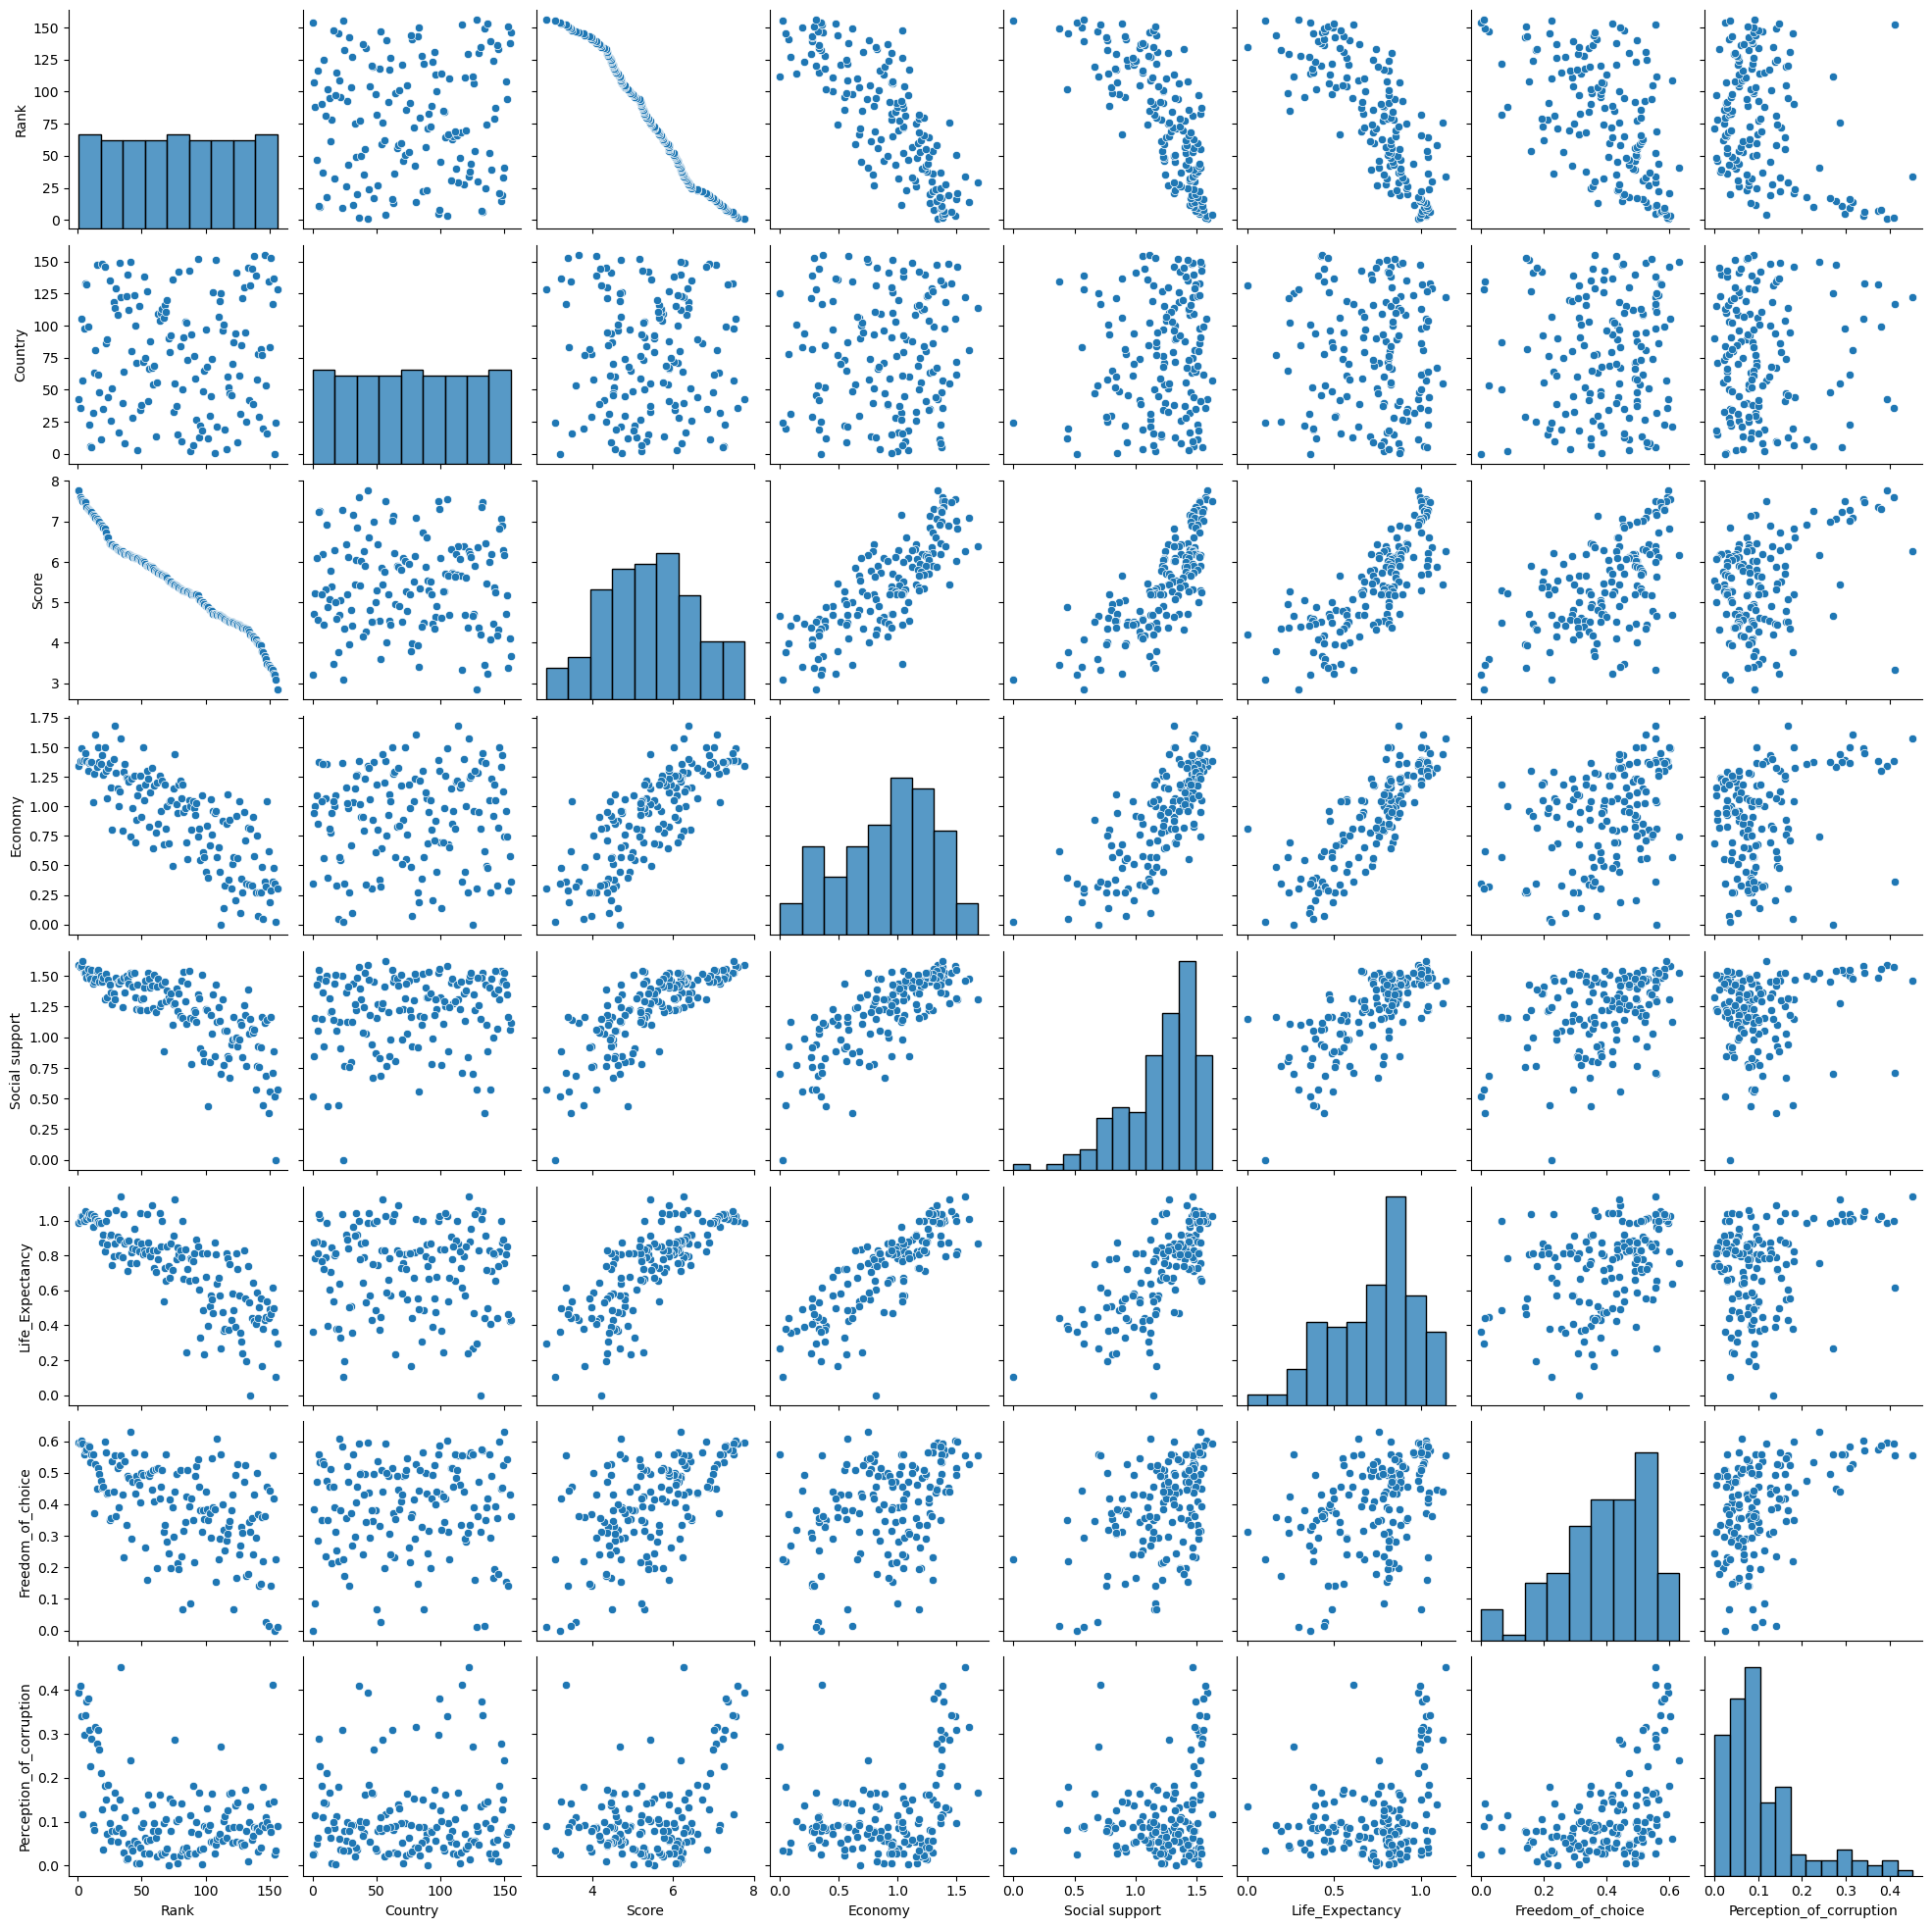

In [117]:
sns.pairplot(df_wh2019)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'PairPlot_2019.pdf'))

## Categorical Plots:
Creating a categorical variable that splits the "Life Expectancy" & "Social Support" column into categories

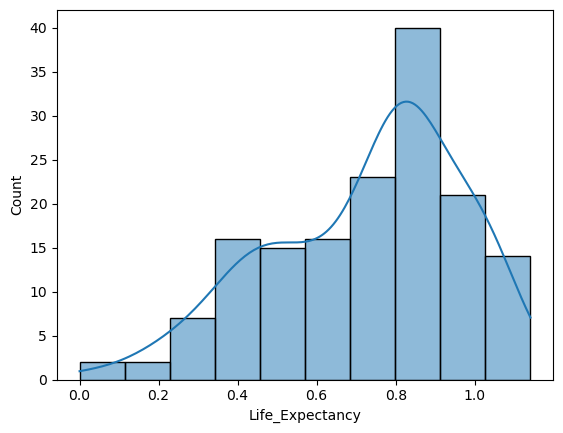

In [125]:
sns.histplot(df_wh2019['Life_Expectancy'], bins = 10, kde = True)
plt.savefig(os.path.join(path, '04 Analysis','Visualization', 'CP_LifeExpect_2019.pdf'))

## Findings
The above Charts present the analysis on Happiness Index and the factors impacting the ranks.
1. Looking into the heatmap, we can observe certain intersting co-relations like as the Economy improves, Social support as well as life expactancy improves as a strong co-relation but the freedom of choice is in weak corelation, hence not impacted significantly-
2. The countries with higher ranks are usually high on Social security scores and low on perception of corruption, thereby showcasing a strong correlation
3. The scatter plots and pairing graph also show that freedom of choice is uniformly distributed across countries with lower perception of corruption and higher social security scores
This sums up most of the answers and explain the variables and their impact on the overall rank. There are some outliers like in every analysis which need to taken as a next step to determine if they are statiscally significant or must be excluded to not influcence the mean and average scores significantly.